What the user need to know about working with the Image analysis model - 

This Machine Learning Program is able to learn the features of a image and is then able to make a desicion with - accuracy on the data used in classiifing cracks. 
To understand how this works the user needs to have a basic understanding of how convolutional neural networks works. 

Importing all the required machine learning libraries to perform the leanring on the data presented - 

In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential  # Our Machine Learning Model is a sequential model 
from keras.layers import Conv2D, MaxPooling2D 
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K

Using TensorFlow backend.


In [14]:
from matplotlib import pyplot
from matplotlib import pyplot as plt

The type of classification we are performing is binary image classification 

Where the defined classes are: - 

1. Positive  - The input image has a crack

2. Negative  - The input image does not have a crack


In [24]:

epochs = 8 # The Number of epochs model learns for
batch_size = 40 # Batch size optimization helps with the learning rate of the model 

if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

In [16]:
class_names = ['Negative', 'Positive'] #The two binary classification classes

train_data_dir = 'Data/train/' # Directory to where Training Images are stored 
validation_data_dir = 'Data/validation/' #Directory link to where all the validation Images are stored 

In [17]:
# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

img_width, img_height = 75, 75 # Input Image Size can be changed to optimize performance 

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 8016 images belonging to 2 classes.
Found 2680 images belonging to 2 classes.


In [ ]:
nb_train_samples = 8016 # Total Training Images in Both Classes 
nb_validation_samples = 2680 # Validation Images

In [18]:
def show_batch(image_batch, label_batch):
  plt.figure(figsize=(15,10))
  for n in range(40):
      ax = plt.subplot(5,10,n+1)
      plt.imshow(image_batch[n])
      plt.title(class_names[label_batch[n]==1][0].title())
      plt.axis('off')

image_batch, label_batch = next(train_generator)

C:\Users\shiva\Anaconda3\envs\opencv\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  


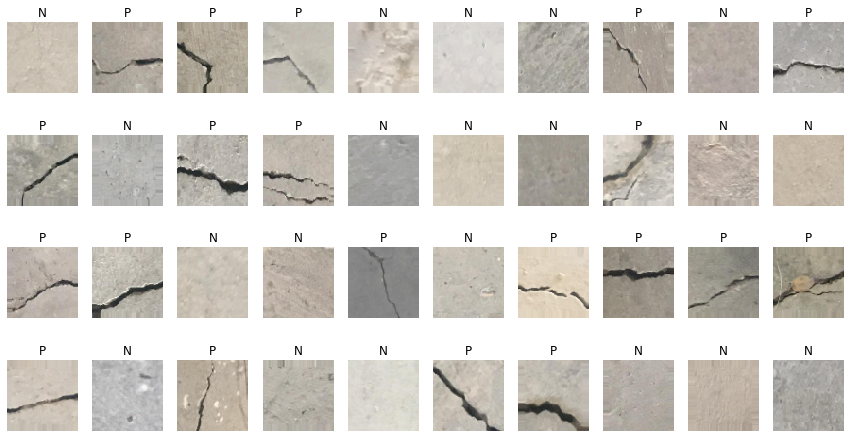

In [19]:
show_batch(image_batch, label_batch) # Shows what a batch of Images looks like 

The CNN Model is defined Below - 

In [22]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu')) # Activation Function of the Layer 
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu')) # Activation Function of the Layer 
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu')) # Activation Function of the Layer 
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))# Activation Function of the Layer 
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))# Activation Function of the Layer 

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

Fitting the Model - 

In [25]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

Epoch 1/8
200/200 [==============================] - 95s 476ms/step - loss: 0.0559 - accuracy: 0.9828 - val_loss: 0.0089 - val_accuracy: 0.9858
Epoch 2/8
200/200 [==============================] - 95s 475ms/step - loss: 0.0563 - accuracy: 0.9851 - val_loss: 0.0961 - val_accuracy: 0.9836
Epoch 3/8
200/200 [==============================] - 95s 473ms/step - loss: 0.0555 - accuracy: 0.9858 - val_loss: 0.0803 - val_accuracy: 0.9832
Epoch 4/8
200/200 [==============================] - 95s 473ms/step - loss: 0.0619 - accuracy: 0.9831 - val_loss: 0.1795 - val_accuracy: 0.9914
Epoch 5/8
200/200 [==============================] - 93s 465ms/step - loss: 0.0565 - accuracy: 0.9842 - val_loss: 0.0159 - val_accuracy: 0.9914
Epoch 6/8
200/200 [==============================] - 96s 481ms/step - loss: 0.0586 - accuracy: 0.9851 - val_loss: 9.4372e-04 - val_accuracy: 0.9784
Epoch 7/8
200/200 [==============================] - 97s 486ms/step - loss: 0.0460 - accuracy: 0.9867 - val_loss: 0.0013 - val_accur

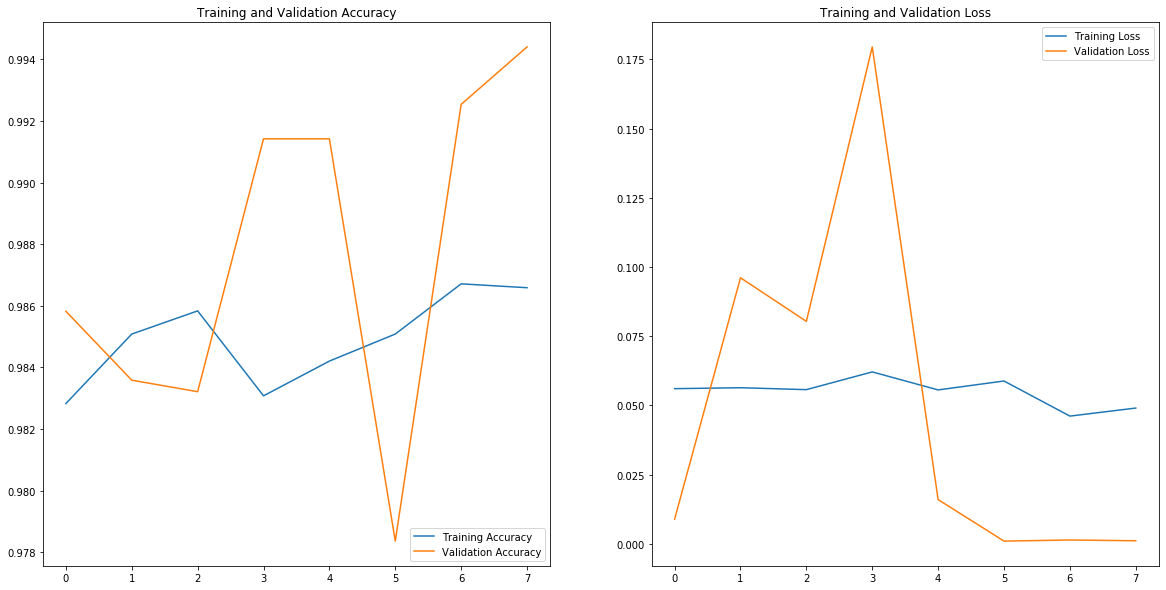

In [26]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [35]:
model.save_weights('5_22_20_w.h5')
model.save('model_5_22_20.h5')
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 73, 73, 32)        896       
_________________________________________________________________
activation_6 (Activation)    (None, 73, 73, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 34, 34, 32)        9248      
_________________________________________________________________
activation_7 (Activation)    (None, 34, 34, 32)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 17, 17, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 15, 15, 64)       

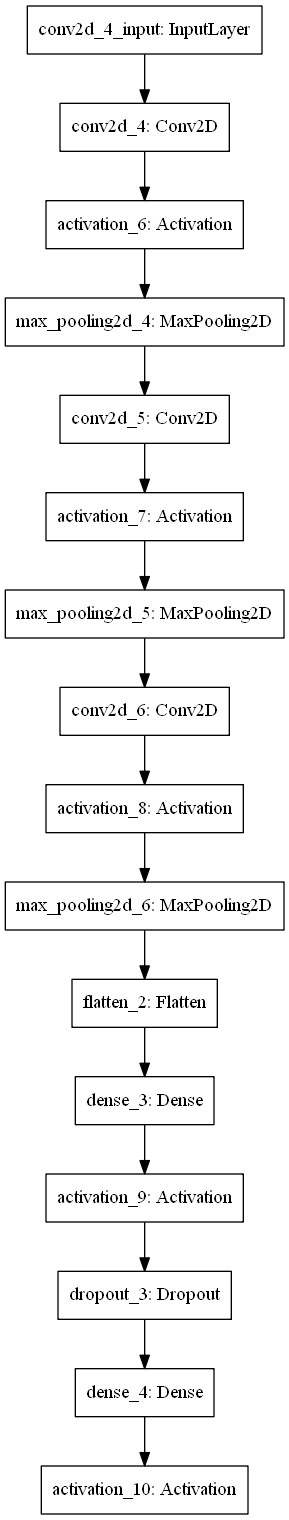

In [30]:
from keras.utils import plot_model
plot_model(model, to_file='model.png')

Testing the Model below 

In [6]:
from matplotlib import pyplot
from matplotlib import pyplot as plt
from matplotlib.image import imread
import cv2

import cv2
from keras.models import load_model
import cv2
import numpy as np

model = load_model('model.h5')

In [31]:
test_generator  = 'SCDetect/'

train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

test_generator = test_datagen.flow_from_directory(
    test_generator,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 40000 images belonging to 2 classes.


In [32]:
test_loss, test_acc = model.evaluate_generator(test_generator, steps=90) # Testing all the images in the full database. 
print('test acc:', test_acc) # printing model accuracy 

test acc: 0.9952777624130249


In [33]:
print('test loss:', test_loss) #prints model loss

test loss: 0.01094557624310255
